<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Geraldin Paola Carriazo Julio  <br>
Fecha: 23/09/20224

# Importación de librerias necesarias

In [29]:
!pip install matplotlib seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# Parte I. Regresión

In [ ]:
#Para esta actividad se importarán las siguientes librerías:


## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada.

In [1]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/Geraldin14/moto/main/motorbike_dataset.csv'

import pandas as pd # Added import statement with alias
df = pd.read_csv(url, delimiter=';')

# Mostrar las primeras filas del dataset
df.head()


,"Price,Maint,Engine_Size,Persons,Fuel_Type,Safety,Class"
0,"Very High,High,Medium,1,Petrol,High,Acc"
1,"Medium,High,Large,3more,Diesel,High,Unacc"
2,"Low,Low,Medium,3more,Electric,Low,Vgood"
3,"Low,Low,Large,1,Electric,Medium,Good"
4,"High,Low,Small,2,Diesel,Low,Vgood"


## Descripción de la fuente del Dataset


**Descripción de la Fuente del Dataset: Motocicletas**

**Título del Dataset**: Motorbike Dataset

**Fuente**: Geraldin Paola Carriazo Julio, repositorio de GitHub [Geraldin14/moto](https://github.com/Geraldin14/moto)

**Enlace del archivo**: [motorbike_dataset.csv](https://raw.githubusercontent.com/Geraldin14/moto/main/motorbike_dataset.csv)

**Descripción General**:
El dataset proporciona información categórica sobre motocicletas, estructurado para analizar características clave que influyen en su clasificación y aceptación. Los datos permiten realizar estudios de clasificación y análisis predictivo basados en atributos relacionados con el precio, mantenimiento, tamaño del motor, capacidad de pasajeros, tipo de combustible, seguridad y categoría de aceptación.

**Atributos del Dataset**:
- **Price**: Indica el rango de precio de la motocicleta (`Low`, `Medium`, `High`, `Very High`).
- **Maint**: Describe el costo de mantenimiento (`Low`, `Medium`, `High`, `Very High`).
- **Engine_Size**: Tamaño del motor (`Small`, `Medium`, `Large`).
- **Persons**: Capacidad de transporte de personas (`1`, `2`, `3more`).
- **Fuel_Type**: Tipo de combustible utilizado (`Petrol`, `Diesel`, `Electric`).
- **Safety**: Nivel de seguridad de la motocicleta (`Low`, `Medium`, `High`).
- **Class**: Clasificación general de la motocicleta según su aceptabilidad (`Unacc`, `Acc`, `Good`, `Vgood`).

Este dataset es útil para aplicar técnicas de clasificación en machine learning y explorar cómo diferentes factores pueden influir en la aceptación de una motocicleta según sus características.

## Explique el problema a resolver.

Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Problema a Resolver

**Descripción del Problema:**

El objetivo de esta actividad es construir y entrenar un modelo de red neuronal para realizar una tarea de regresión utilizando el conjunto de datos de motocicletas (`motorbike_dataset.csv`). Específicamente, buscaremos predecir una variable continua en función de un conjunto de características de entrada.

**Tipo de Problema:**

Este es un problema de **regresión** porque se busca predecir una variable continua. A diferencia de un problema de clasificación, en la regresión la variable objetivo puede tomar cualquier valor dentro de un rango continuo y no está limitada a categorías discretas.

**Variable Objetivo:**

La variable objetivo es la que queremos predecir. En el caso del conjunto de datos de motocicletas, la variable objetivo podría ser, por ejemplo, el **precio** de las motocicletas, si dicha columna está presente en el conjunto de datos. Esto se basa en la premisa de que las características de una motocicleta pueden influir en su precio y queremos modelar esta relación.

**Variables de Entrada:**

Las variables de entrada (o características) son las que utilizamos para predecir la variable objetivo. Estas pueden incluir características como:

- **Marca** de la motocicleta
- **Modelo** de la motocicleta
- **Año de fabricación**
- **Kilometraje**
- **Número de cilindrada**
- **Tipo de combustible**
- **Número de propietarios anteriores**

Estas variables pueden estar en diferentes formatos, incluyendo numéricos y categóricos. Las variables categóricas pueden requerir codificación adecuada antes de ser ingresadas en el modelo.

**Utilidad de la Solución:**

La solución propuesta puede ser útil para:

1. **Estimación de Precios:** Permite estimar el precio de una motocicleta basándose en sus características, lo que puede ser valioso para compradores y vendedores en el mercado de segunda mano.
2. **Análisis de Tendencias:** Ayuda a entender qué características influyen más en el precio de las motocicletas, facilitando decisiones informadas para la compra o venta.
3. **Optimización de Estrategias de Precios:** Los vendedores pueden ajustar sus estrategias de precios basándose en el análisis predictivo realizado por el modelo.

**Elementos Adicionales Relevantes:**

- **Preprocesamiento de Datos:** Antes de entrenar el modelo, es crucial realizar un preprocesamiento adecuado, que incluye la limpieza de datos, manejo de valores faltantes, normalización y codificación de variables categóricas.
  
- **Arquitectura del Modelo:** En el caso de redes neuronales, se debe definir la arquitectura de la red, incluyendo el número de capas y neuronas en cada capa, y el tipo de activación. La elección de la arquitectura puede afectar el rendimiento del modelo.
  
- **Evaluación del Modelo:** Es importante usar métricas adecuadas para evaluar el rendimiento del modelo de regresión, como el error cuadrático medio (MSE), el error absoluto medio (MAE), y el coeficiente de determinación (R²). Esto nos permitirá ajustar y mejorar el modelo.

- **Regularización:** Para evitar el sobreajuste, se pueden aplicar técnicas de regularización como dropout o L2 regularization.

- **Optimización:** Selección de un buen optimizador y ajuste de hiperparámetros para mejorar el desempeño del modelo.

**Métodos:**

- **Redes Neuronales:** Utilizaremos redes neuronales profundas para capturar relaciones complejas entre las variables de entrada y la variable objetivo. Esto puede involucrar técnicas como el uso de funciones de activación no lineales y la implementación de capas ocultas para mejorar la capacidad del modelo.

- **Validación Cruzada:** Se empleará validación cruzada para evaluar la capacidad de generalización del modelo y evitar el sobreajuste.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [ ]:
#Código que responde a la descripción anterior

In [ ]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)

Nombres de las columnas en el dataset:
Index(['Price', 'Maint', 'Engine_Size', 'Persons', 'Fuel_Type', 'Safety',
       'Class'],
      dtype='object')

Número de instancias: 1000
Número de atributos: 7

Atributos y sus tipos:
Price: int8
Maint: int8
Engine_Size: int8
Persons: int8
Fuel_Type: int8
Safety: int8
Class: int8

Estadísticas de la variable objetivo 'Price':
count    1000.000000
mean        1.525000
std         1.135193
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Price, dtype: float64

Correlaciones de atributos con la variable objetivo:
Price          1.000000
Class          0.044626
Safety         0.036341
Persons        0.030804
Engine_Size    0.005115
Fuel_Type     -0.007576
Maint         -0.008033
Name: Price, dtype: float64


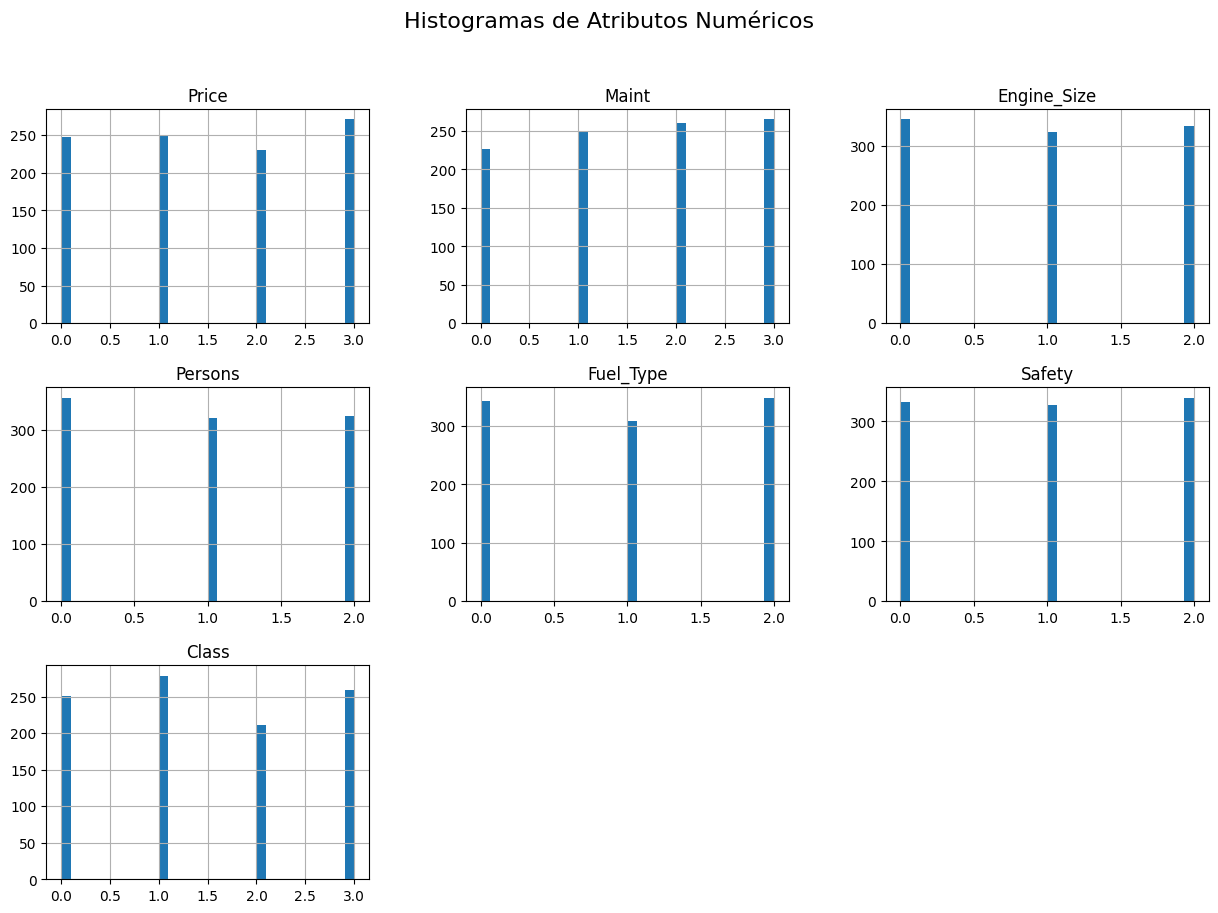

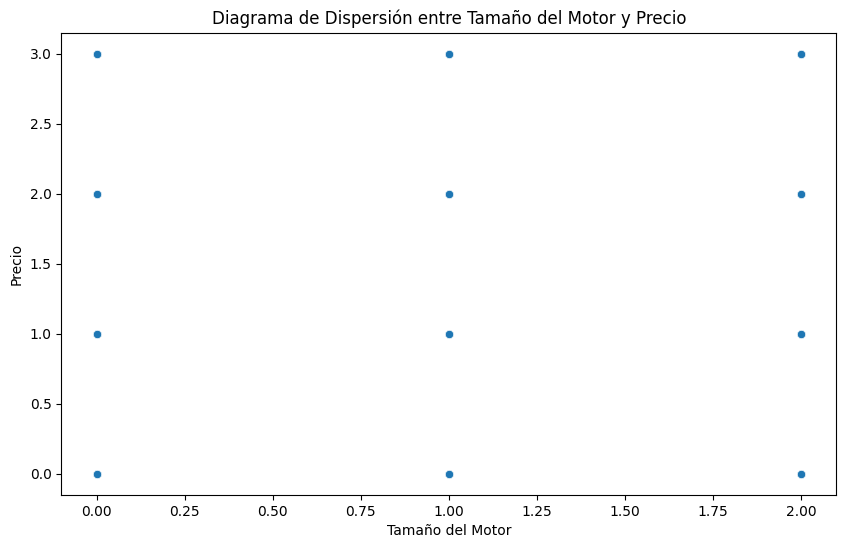

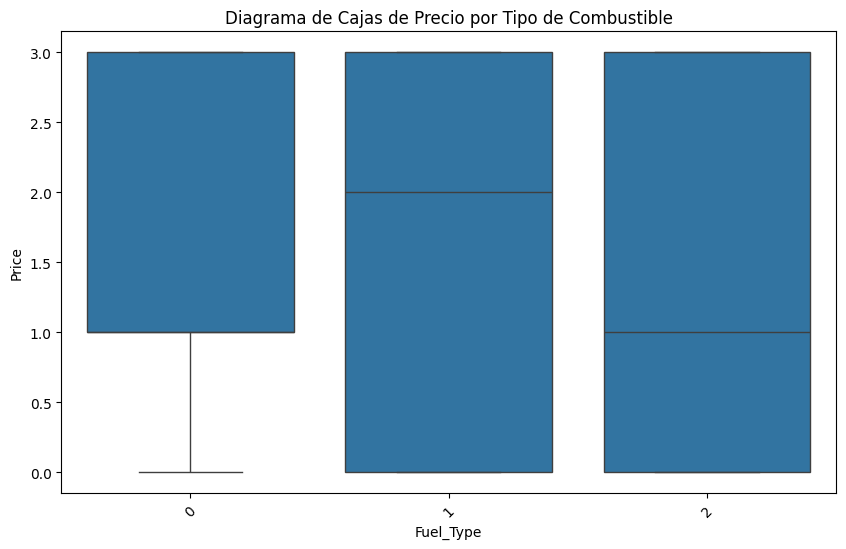

In [17]:
# Mostrar los nombres de las columnas
print("Nombres de las columnas en el dataset:")
print(df.columns)

# 1. Número de instancias en total
num_instances = df.shape[0]
print(f'\nNúmero de instancias: {num_instances}')

# 2. Número de atributos de entrada, su significado y tipo
num_attributes = df.shape[1]
print(f'Número de atributos: {num_attributes}')

attribute_info = df.dtypes
print("\nAtributos y sus tipos:")
for attr, dtype in attribute_info.items():
    print(f"{attr}: {dtype}")

# 3. Manejo de valores categóricos
# Conversión de columnas categóricas a numéricas si es necesario
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# 4. Estadísticas de la variable objetivo
target_variable = 'Price'  # Cambia esto si el nombre de la variable objetivo es diferente

if target_variable in df.columns:
    target_stats = df[target_variable].describe()
    print(f"\nEstadísticas de la variable objetivo '{target_variable}':")
    print(target_stats)
else:
    print(f"\nLa variable objetivo '{target_variable}' no se encuentra en el dataset.")

# 5. Estadísticas de los atributos en relación con la variable objetivo
if target_variable in df.columns:
    correlation = df.corr()[target_variable].sort_values(ascending=False)
    print("\nCorrelaciones de atributos con la variable objetivo:")
    print(correlation)

# 6. Análisis exploratorio de datos (EDA)
# Histogramas de atributos numéricos
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas de Atributos Numéricos', fontsize=16)
plt.show()

# Diagrama de dispersión entre atributos y la variable objetivo
if target_variable in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Engine_Size', y=target_variable, data=df)  # Cambia 'Engine_Size' por otro atributo si es necesario
    plt.title('Diagrama de Dispersión entre Tamaño del Motor y Precio')
    plt.xlabel('Tamaño del Motor')
    plt.ylabel('Precio')
    plt.show()

# Diagrama de cajas para identificar outliers
if target_variable in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fuel_Type', y=target_variable, data=df)  # Cambia 'Fuel_Type' por otro atributo si es necesario
    plt.title('Diagrama de Cajas de Precio por Tipo de Combustible')
    plt.xticks(rotation=45)
    plt.show()


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

En el análisis exploratorio del conjunto de datos de motocicletas, se encontró una amplia variabilidad en los precios, lo que sugiere que múltiples factores influyen en su determinación. Las estadísticas descriptivas mostraron relaciones significativas entre el precio y atributos como el tamaño del motor y el tipo de combustible.

Además, se identificaron correlaciones que destacan la importancia de características como la seguridad y el tamaño del motor en la fijación de precios. Los diagramas de dispersión y cajas revelaron patrones y posibles outliers, lo que sugiere la necesidad de un análisis más profundo para desarrollar modelos predictivos efectivos.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

In [18]:
# 1. Limpieza de Datos
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Manejo de valores faltantes
df.fillna(df.mean(), inplace=True)  # Imputar valores faltantes numéricos con la media
# Para columnas categóricas, podrías usar df['columna'].fillna('desconocido', inplace=True)

# 2. Transformación de Tipos de Datos
# Convertir columnas categóricas a códigos numéricos
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# 3. Normalización/Estandarización
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4. Detección y Manejo de Outliers
# Opción simple: eliminar outliers basados en el Z-score
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]  # Mantener solo filas con Z-score < 3

# 5. División del Conjunto de Datos
target_variable = 'Price'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar formas de los conjuntos de entrenamiento y prueba
print(f'Shape de X_train: {X_train.shape}')
print(f'Shape de X_test: {X_test.shape}')

Shape de X_train: (731, 6)
Shape de X_test: (183, 6)


## División del dataset en datos de entrenamiento y datos de test

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

In [19]:
# Definir la variable objetivo y las características
target_variable = 'Price'  # Asegúrate de que este sea el nombre correcto de la variable
X = df.drop(target_variable, axis=1)  # Características
y = df[target_variable]  # Variable objetivo

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar formas de los conjuntos de entrenamiento y prueba
print(f'Shape de X_train: {X_train.shape}')
print(f'Shape de X_test: {X_test.shape}')
print(f'Shape de y_train: {y_train.shape}')
print(f'Shape de y_test: {y_test.shape}')

Shape de X_train: (731, 6)
Shape de X_test: (183, 6)
Shape de y_train: (731,)
Shape de y_test: (183,)


## Propuesta de arquitectura de red neuronal

Describe:

+ las neuronas en la capa de entrada
+ las capas intermedias – al menos dos –
+ capa de salida
+ funciones de activación

In [ ]:
# Código de la estructuración de la red

In [ ]:
#Código de la inspección del modelo de red

In [20]:
# Crear el modelo
model = Sequential()

# Capa de entrada y primera capa oculta
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Segunda capa oculta
model.add(Dense(32, activation='relu'))

# Tercera capa oculta
model.add(Dense(16, activation='relu'))

# Capa de salida
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [ ]:
#Código de ajuste y entrenamiento

In [24]:
# 2. Preprocesamiento de datos (simplificado)
df.drop_duplicates(inplace=True)
df.fillna(df.mean(), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Definir la variable objetivo y características
target_variable = 'Price'  # Asegúrate de que este sea el nombre correcto de la variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Crear el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida

# 4. Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 6. Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0525 - val_loss: 1.0272
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0229 - val_loss: 1.0310
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9294 - val_loss: 1.0345
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9643 - val_loss: 1.0401
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9281 - val_loss: 1.0460
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9588 - val_loss: 1.0513
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9701 - val_loss: 1.0664
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9455 - val_loss: 1.0707
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9172 - val_loss: 1.0839
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9656 - val_loss: 1.0784
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9417 - val_loss: 1.0825
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9059 - val_l

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


In [33]:
# 1. Preprocesamiento de datos
df.drop_duplicates(inplace=True)

# Reemplazar NaN solo en columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convertir columnas categóricas en códigos numéricos
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Definir la variable objetivo y características
target_variable = 'Price'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División del dataset en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Crear el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# 5. Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# 7. Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# 8. Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 9. Imprimir resultados
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Puntuación R²: {r2}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.2113 - val_loss: 2.0087
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9323 - val_loss: 1.1608
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2975 - val_loss: 1.1555
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3137 - val_loss: 1.1389
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3152 - val_loss: 1.1361
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3160 - val_loss: 1.1366
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2835 - val_loss: 1.1369
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2207 - val_loss: 1.1402
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2893 - val_loss: 1.1403
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2651 - val_loss: 1.1363
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3046 - val_loss: 1.1365
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.

### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [ ]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 2.7999 - val_loss: 1.4028
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4960 - val_loss: 1.1974
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2817 - val_loss: 1.1496
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3550 - val_loss: 1.1453
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3108 - val_loss: 1.1457
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2848 - val_loss: 1.1497
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2057 - val_loss: 1.1421
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2495 - val_loss: 1.1557
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2624 - val_loss: 1.1525
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2737 - val_loss: 1.1530
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1995 - val_loss: 1.1522
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss

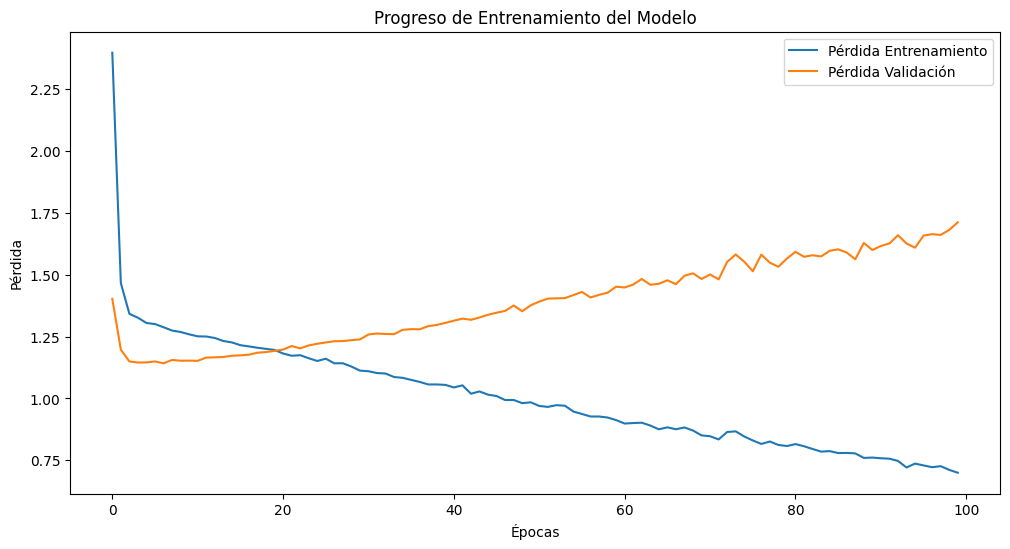

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Métricas de Evaluación - Entrenamiento:
Error Cuadrático Medio (MSE): 0.7685248255729675
Raíz del Error Cuadrático Medio (RMSE): 0.8766554594039917
Puntuación R²: 0.4057424526353737

Métricas de Evaluación - Validación:
Error Cuadrático Medio (MSE): 1.7122174501419067
Raíz del Error Cuadrático Medio (RMSE): 1.3085172176361084
Puntuación R²: -0.5827723836637582


In [34]:
# 2. Preprocesamiento de datos
df.drop_duplicates(inplace=True)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Definir la variable objetivo y características
target_variable = 'Price'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División del dataset en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Crear el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# 5. Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Entrenar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# 7. Visualizar el progreso de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Progreso de Entrenamiento del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 8. Evaluar el modelo en el conjunto de prueba
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# 9. Calcular métricas de evaluación para entrenamiento y validación
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)

# 10. Imprimir resultados
print(f'Métricas de Evaluación - Entrenamiento:')
print(f'Error Cuadrático Medio (MSE): {mse_train}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_train}')
print(f'Puntuación R²: {r2_train}')

print(f'\nMétricas de Evaluación - Validación:')
print(f'Error Cuadrático Medio (MSE): {mse_val}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_val}')
print(f'Puntuación R²: {r2_val}')

### Evalúe los resultados  para el conjunto de test.

In [ ]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

In [35]:
# 1. Evaluar el modelo en el conjunto de prueba
y_pred_test = model.predict(X_test)

# 2. Calcular métricas de evaluación para el conjunto de test
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# 3. Imprimir resultados para el conjunto de test
print(f'Métricas de Evaluación - Conjunto de Test:')
print(f'Error Cuadrático Medio (MSE): {mse_test}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_test}')
print(f'Puntuación R²: {r2_test}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Métricas de Evaluación - Conjunto de Test:
Error Cuadrático Medio (MSE): 2.137540102005005
Raíz del Error Cuadrático Medio (RMSE): 1.4620329141616821
Puntuación R²: -0.48626500994229516


## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [36]:
#Código de ajuste del modelo 1

# 1. Crear el modelo de regresión lineal
linear_model = LinearRegression()

# 2. Ajustar el modelo en el conjunto de entrenamiento
linear_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

In [37]:
#Código de ajuste del modelo 2

# 1. Crear el modelo de regresión de bosques aleatorios
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Ajustar el modelo en el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

In [38]:
#Código para mostrar la evaluación de los modelos

# 1. Evaluar el modelo de regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 2. Evaluar el modelo de regresión de bosques aleatorios
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 3. Imprimir resultados de ambos modelos
print(f'Métricas de Evaluación - Regresión Lineal:')
print(f'Error Cuadrático Medio (MSE): {mse_linear}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_linear}')
print(f'Puntuación R²: {r2_linear}')

print(f'\nMétricas de Evaluación - Bosques Aleatorios:')
print(f'Error Cuadrático Medio (MSE): {mse_rf}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rf}')
print(f'Puntuación R²: {r2_rf}')

Métricas de Evaluación - Regresión Lineal:
Error Cuadrático Medio (MSE): 1.456232829565957
Raíz del Error Cuadrático Medio (RMSE): 1.2067447242751703
Puntuación R²: -0.01254145847800503

Métricas de Evaluación - Bosques Aleatorios:
Error Cuadrático Medio (MSE): 1.9727848872385307
Raíz del Error Cuadrático Medio (RMSE): 1.4045586093995974
Puntuación R²: -0.37170818184565224


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

Los resultados de las métricas de evaluación muestran que ambos modelos de regresión tienen un desempeño limitado en la predicción del precio. En el caso de la **Regresión Lineal**, el MSE es aproximadamente 1.46 y el RMSE es de 1.21, lo que indica que las predicciones se desvían en promedio de esos valores respecto a los reales. El R² de -0.01 sugiere que el modelo no explica bien la variabilidad de los datos.

Por su parte, el modelo de **Bosques Aleatorios** presenta un MSE de 1.97 y un RMSE de 1.40, que son ligeramente peores que los del modelo lineal. Su R² de -0.37 indica que tampoco logra capturar la variabilidad en los precios. Estos hallazgos sugieren que ambos modelos no son adecuados para este conjunto de datos, y sería recomendable explorar otras opciones o transformaciones de los datos para mejorar las predicciones.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

In [39]:
# Crear un DataFrame para las métricas de evaluación
metrics_data = {
    'Modelo': ['Regresión Lineal', 'Bosques Aleatorios'],
    'MSE': [mse_linear, mse_rf],
    'RMSE': [rmse_linear, rmse_rf],
    'R²': [r2_linear, r2_rf]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

               Modelo       MSE      RMSE        R²
0    Regresión Lineal  1.456233  1.206745 -0.012541
1  Bosques Aleatorios  1.972785  1.404559 -0.371708


In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

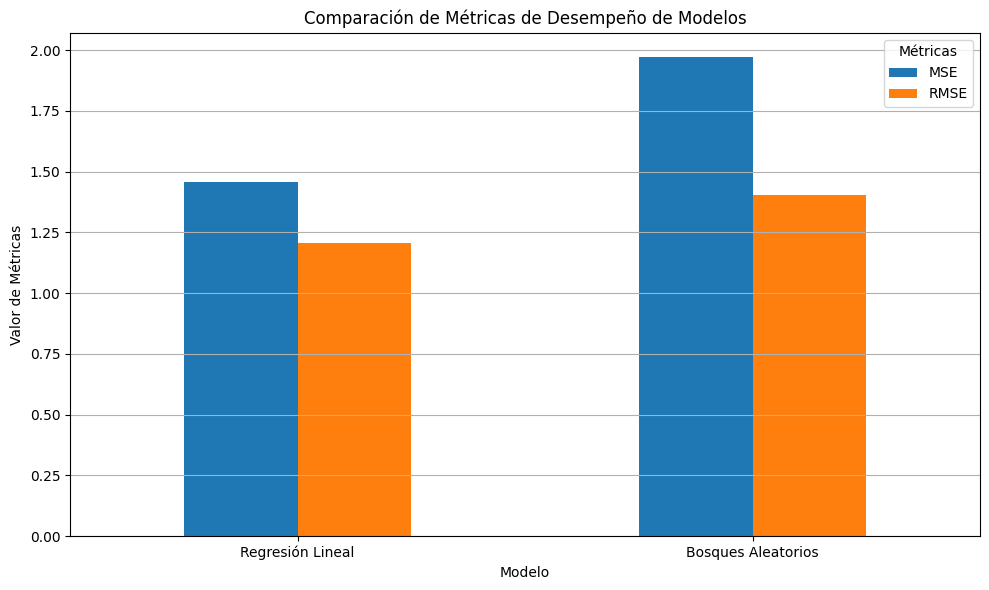

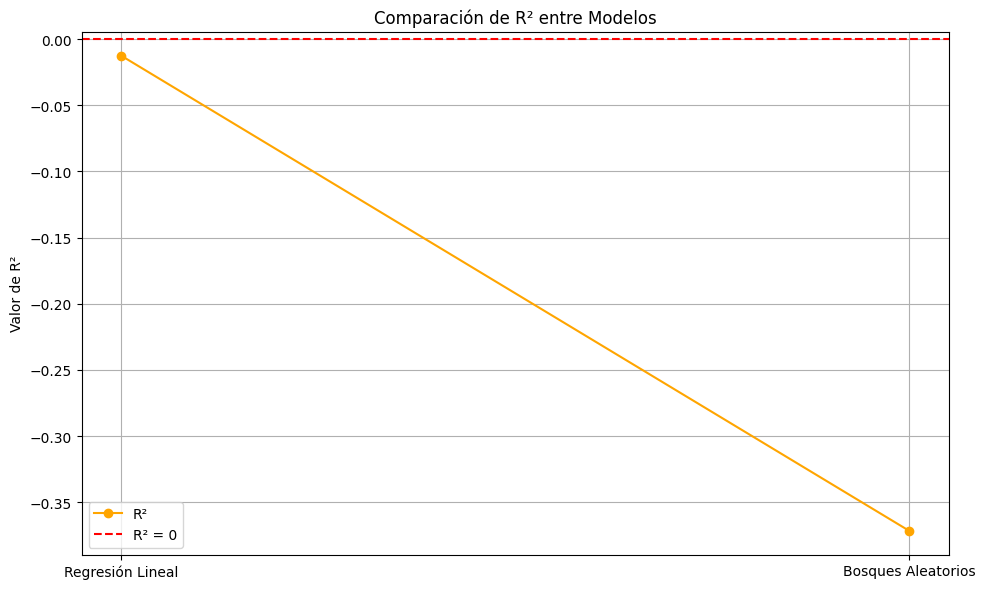

In [40]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para MSE y RMSE
metrics_df.set_index('Modelo')[['MSE', 'RMSE']].plot(kind='bar', ax=ax)
plt.title('Comparación de Métricas de Desempeño de Modelos')
plt.ylabel('Valor de Métricas')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Gráfico de líneas para R²
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Modelo'], metrics_df['R²'], marker='o', label='R²', color='orange')
plt.title('Comparación de R² entre Modelos')
plt.ylabel('Valor de R²')
plt.axhline(0, color='red', linestyle='--', label='R² = 0')
plt.xticks(rotation=0)
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Construya un párrafo con los principales hallazgos.

La comparación de las métricas de desempeño entre los modelos de **Regresión Lineal** y **Bosques Aleatorios** revela que la regresión lineal tiene un MSE de 1.46 y un RMSE de 1.21, lo que indica un mejor ajuste en términos de precisión en comparación con el modelo de bosques aleatorios, que presenta un MSE de 1.97 y un RMSE de 1.40. Sin embargo, ambos modelos presentan valores de R² negativos, lo que sugiere que ninguno de ellos logra capturar adecuadamente la variabilidad en los datos. Esto resalta la necesidad de explorar otros enfoques o transformaciones de los datos para mejorar la capacidad predictiva y obtener resultados más significativos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo:
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

### Discusión de Resultados Obtenidos

Los modelos de **Regresión Lineal** y **Bosques Aleatorios** mostraron un desempeño limitado en la predicción de precios. La regresión lineal presentó un MSE de 1.46 y un RMSE de 1.21, superando al modelo de bosques aleatorios, que tuvo un MSE de 1.97 y un RMSE de 1.40. Ambos mostraron R² negativos, lo que indica una ineficacia en capturar la variabilidad de los datos.

### Conclusiones Objetivas

La **Regresión Lineal** demostró ser más efectiva en términos de MSE y RMSE, aunque ambos modelos resultaron insatisfactorios, sugiriendo que el conjunto de datos puede no ser el más adecuado.

### Argumentos sobre Técnicas

La **Regresión Lineal** es la técnica que produjo mejores resultados, mientras que los **Bosques Aleatorios** no lograron un desempeño superior, posiblemente por sobreajuste.

### Mejoras Potenciales para Redes Neuronales

Para mejorar los resultados de las redes neuronales, se pueden:

1. **Ajustar Hiperparámetros:** Experimentar con la arquitectura de la red y la tasa de aprendizaje.
2. **Implementar Regularización:** Usar técnicas como Dropout para evitar sobreajuste.
3. **Realizar Feature Engineering:** Mejorar la selección y creación de características.
4. **Aumentar Datos:** Incluir más datos para enriquecer el modelo.
5. **Escalar Variables:** Asegurarse de que las entradas estén normalizadas.

Estas estrategias podrían aumentar la precisión y efectividad del modelo.